In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Load encoded features (from the autoencoder step)

In [2]:
X_train_encoded = np.load('X_train_encoded_basic.npy')
X_test_encoded = np.load('X_test_encoded_basic.npy')

In [3]:
df = pd.read_csv('RAW_eeg_data.csv')
y = (df['Condition'] == 'AD').astype(int)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=3)

Decision tree

In [4]:
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=3)

In [5]:
train_score_dt = dt.score(X_train_encoded, y_train)
test_score_dt = dt.score(X_test_encoded, y_test)
print('Decision Tree Train score:', train_score_dt)
print('Decision Tree Test score:', test_score_dt)

Decision Tree Train score: 0.9921259842519685
Decision Tree Test score: 0.8363636363636363


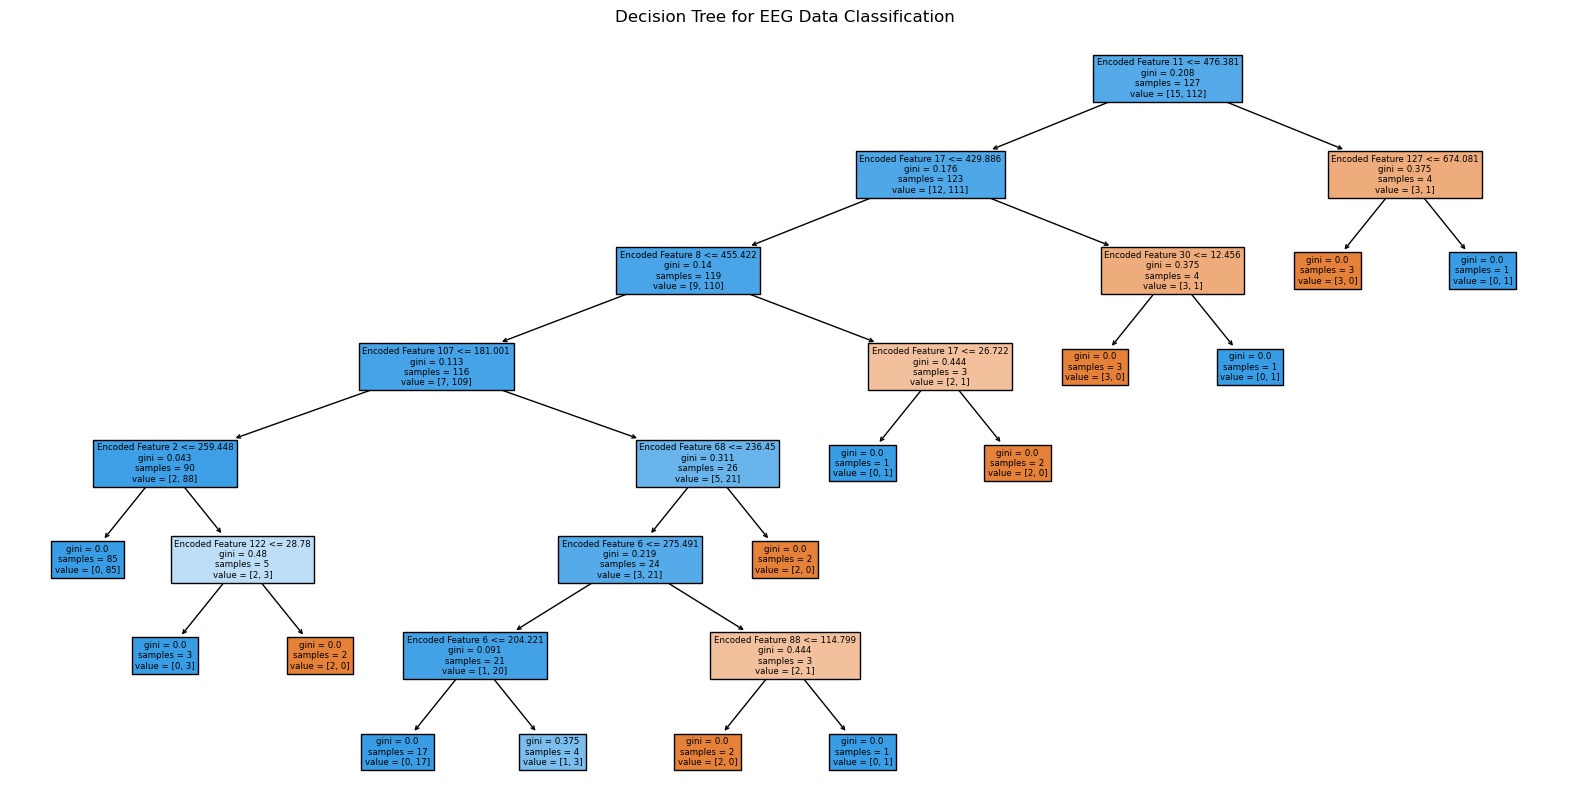

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=[f'Encoded Feature {i}' for i in range(X_train_encoded.shape[1])])
plt.title("Decision Tree for EEG Data Classification")
plt.show()

In [29]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11)
 
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, cv=5)
grid_dt.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11)})

In [30]:
print("Best hyperparameters for Decision Tree:", grid_dt.best_params_)
print("Best Score: {:.2f}".format(grid_dt.best_score_))

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 1}
Best Score: 0.87


In [35]:
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=3)
best_dt.fit(X_train_encoded, y_train)
print('Optimized Decision Tree Test score:', best_dt.score(X_test_encoded, y_test))

Optimized Decision Tree Test score: 0.8727272727272727


Random Classifier

In [36]:
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=3)

In [37]:
train_score_rf = rf.score(X_train_encoded, y_train)
test_score_rf = rf.score(X_test_encoded, y_test)
print('Random Forest Train score:', train_score_rf)
print('Random Forest Test score:', test_score_rf)

Random Forest Train score: 0.9921259842519685
Random Forest Test score: 0.8363636363636363


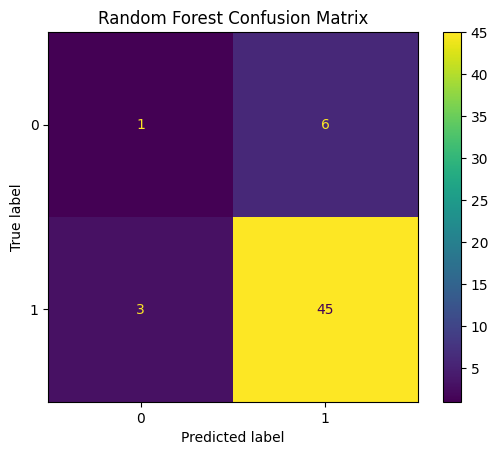

In [38]:
y_pred_rf = rf.predict(X_test_encoded)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

In [39]:
param_grid_rf = {
    'n_estimators': range(10, 90, 10),
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=3), param_grid_rf, cv=5)
grid_rf.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'n_estimators': range(10, 90, 10)})

In [16]:
print("Best hyperparameters for Random Forest:", grid_rf.best_params_)
print("Best Score: {:.2f}".format(grid_rf.best_score_))

Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 10}
Best Score: 0.89


In [49]:
best_rf = RandomForestClassifier(criterion= 'gini', max_depth=1, n_estimators= 10, random_state=3)
best_rf.fit(X_train_encoded, y_train)
print('Optimized Random Forest Test score:', best_rf.score(X_test_encoded, y_test))

Optimized Random Forest Test score: 0.8727272727272727


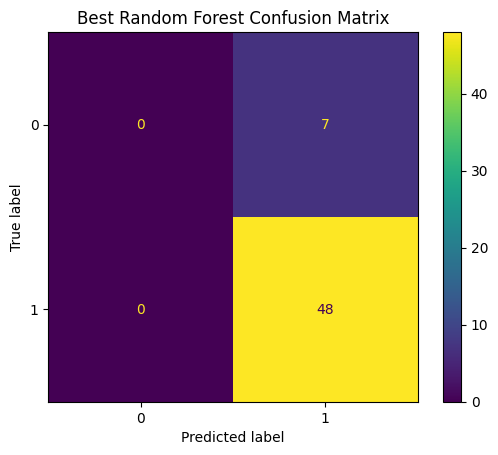

In [50]:
y_pred_best_rf = best_rf.predict(X_test_encoded)
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf)
disp_best_rf.plot()
plt.title("Best Random Forest Confusion Matrix")
plt.show()

Support Vector Machine

In [51]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train_encoded, y_train)

SVC(gamma='auto')

In [52]:
svm_test_score = svm_model.score(X_test_encoded, y_test)
svm_train_score = svm_model.score(X_train_encoded, y_train)
print('SVM Test score:', svm_test_score)
print('SVM Train score:', svm_train_score)

SVM Test score: 0.8363636363636363
SVM Train score: 0.9921259842519685


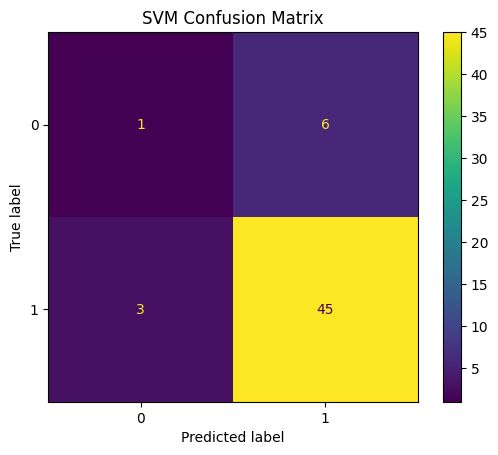

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_svm = svm_model.predict(X_test_encoded)
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('SVM Confusion Matrix')
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  
}
svm_model = SVC()
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train_encoded, y_train)
best_params_svm = grid_search_svm.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params_svm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters found by GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [58]:
print("Best Score found by GridSearchCV:", grid_search_svm.best_score_)

Best Score found by GridSearchCV: 0.8818461538461537


In [59]:
best_svm_model = grid_search_svm.best_estimator_
svm_test_score = best_svm_model.score(X_test_encoded, y_test)
svm_train_score = best_svm_model.score(X_train_encoded, y_train)
print('Optimized SVM Test score:', svm_test_score)
print('Optimized SVM Train score:', svm_train_score)

Optimized SVM Test score: 0.8727272727272727
Optimized SVM Train score: 0.8818897637795275


KNN Model


In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(weights='distance', algorithm='auto', metric='manhattan')
knn_model.fit(X_train_encoded,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [55]:
knn_test_score = knn_model.score(X_test_encoded, y_test)
knn_train_score = knn_model.score(X_train_encoded, y_train)
print('KNN Test score:', knn_test_score)
print('KNN Train score:', knn_train_score)

KNN Test score: 0.8363636363636363
KNN Train score: 0.9921259842519685


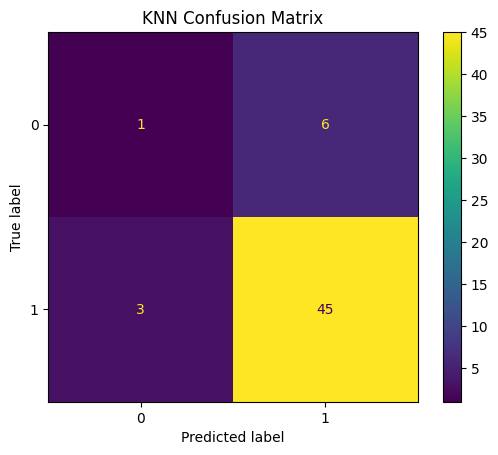

In [56]:
y_pred_knn = knn_model.predict(X_test_encoded)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('KNN Confusion Matrix')
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree']  # Algorithm used to compute nearest neighbors
}
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [61]:
print("Best hyperparameters found by GridSearchCV for KNN:", grid_search_knn.best_params_)
print("Best Score found by GridSearchCV for KNN:", grid_search_knn.best_score_)

Best hyperparameters found by GridSearchCV for KNN: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score found by GridSearchCV for KNN: 0.8818461538461537


In [62]:
best_knn_model = grid_search_knn.best_estimator_
knn_test_score = best_knn_model.score(X_test_encoded, y_test)
knn_train_score = best_knn_model.score(X_train_encoded, y_train)
print('Optimized KNN Test score:', knn_test_score)
print('Optimized KNN Train score:', knn_train_score)

Optimized KNN Test score: 0.8727272727272727
Optimized KNN Train score: 0.8818897637795275


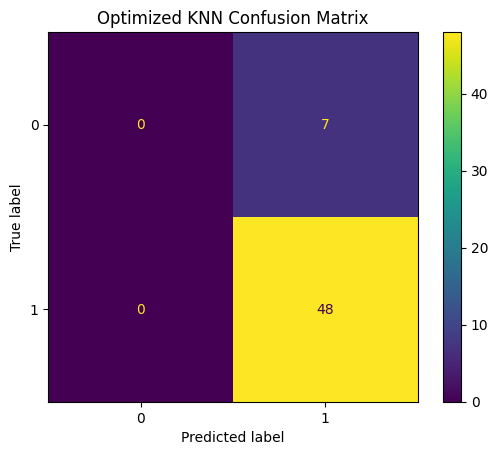

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_knn = best_knn_model.predict(X_test_encoded)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('Optimized KNN Confusion Matrix')
plt.show()